# Fake Review Generation on the Yelp Dataset

More information on the Yelp dataset: https://www.yelp.com/dataset

In [ ]:
!python3 -V

Python 3.8.15


In [ ]:
!pip3 install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install transformers
!pip install fastai==2.2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 1.2 MB/s eta 0:04:24tcmalloc: large alloc 1147494400 bytes == 0x38ffe000 @  0x7f30ef967615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████████████████████████████▏  | 1055.7 MB 1.1 MB/s eta 0:01:31tcmalloc: large alloc 1434370048 bytes == 0x7d654000 @  0x7f30ef967615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████

In [ ]:
import gc
import torch
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
from fastai.text.all import *

In [ ]:
print(torch. __version__)

1.7.1+cu110


In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!tar -xvf /content/drive/MyDrive/YelpDataset/yelp_dataset.tar

In [ ]:
!ls /content/drive/MyDrive/YelpDataset/dataframes

AutoDF.pkl		     HealthMedicalDF.pkl  restaurantDF.pkl
beautyandSpaDF.pkl	     HomeServicesDF.pkl   shoppingDF.pkl
EventPlanningServicesDF.pkl  LocalServicesDF.pkl
foodDF.pkl		     NightlifeDF.pkl


In [ ]:
#%cp /content/yelp_academic_dataset_review.json /content/drive/MyDrive/YelpDataset

In [ ]:
#%cp /content/drive/MyDrive/YelpDataset/yelp_academic_dataset_review.json /content/
%cp /content/drive/MyDrive/YelpDataset/dataframes/HomeServicesDF.pkl /content/

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_pickle('HomeServicesDF.pkl')

In [ ]:
df.shape

(166452, 15)

In [ ]:
#process the yelp dataset in similar fashion to the amazon review dataset.
#we'll only need the text coloumn in our case
df_main = df[['text']]

In [ ]:
df_main = df_main.rename(columns={'text': 'reviewText'})

In [ ]:
df_main.head(20)

,reviewText
96964,"I've gotta say we couldn't have been more pleased with Jen.\n\nHer patience with us through every step of the process was bar none. And as a first-time homebuyer that's been invaluable. She helped lead us through the fog to understand what we wanted for ourselves, and focus on what was most important for us, providing knowledgeable info on neighborhoods and housing options, despite our wide open search criteria and times of indecisiveness. She even lasted through a deal that fell through after an inspection, with no hint of complaint. \n\nI felt like Jen was Always there for us (over wh..."
96965,Quick 24hr effificent locksmith. Charlie was our tech and he was very fast and understanding. The work was done well and quickly. Not the cheapest but we didn't mind paying for same day quick excellent service. We couldn't be more pleased.
96966,"I called AMPM locksmith for my house where i have a very old lock as well as a rental property, very professional, knows the problem and the solution in a matter of minutes the lock was fixed and replaced damaged parts. Reasonably priced, a true pro!"
96967,"Had to get my locks changed. Called up and was told they would be there in 45 minutes. I got a call and Garrett was already there. Since I was still on my way and stuck in traffic I felt bad and thought they would leave. Nope, he asked what I needed and did the work. Could have charged extra but was honest and told me I didn't need the dead bolt removed. By the time I got there everything was complete and I just needed to pay. \n\nAwesome service. Awesome prices. Would recommend them to anybody."
96968,I called AM PM Locksmith after my bike key broke in the lock. I was able to coordinate a time with Shay to come assess the situation and free my bike. We discussed options: 1.) dig broken key out and leave the bike until a replacement key arrived OR 2.) cut the lock. He said that even with the broken key removed the lock couldn't be picked so we decided to cut the lock and in a few short seconds my bike was free again.\n\nHe had all the tools needed to get the job done and at my convenience. I'd definitely recommend him to others and will keep the AM PM Locksmith number on hand for other k...
96969,"Awesome service. Arrived early, called with updates and made easy recommendations for home locks that were quality and would last, without unnecessary electronic options I was considering. Great service, perfect quality and Shay backs everything up. 5 star reviews for a reason. Thanks for the home door upgrades, will take a bomb to break in now."
96970,"I called Shay this morning to replace a lock in our new home. I lucked out that he was nearby in the area. Within a couple of hours, he came and the job was done. Quick work, great service, very happy!"
96971,"Very helpful!! We locked our keys in our car - found him on yelp. He came very quickly and was flexible as to when we could get back to our car. (We had an engagement to get to). Very nice guy, quick service and reasonable pricing!"
96972,"I truly can't say enough good things about these guys. Excellent Service!! They come very quickly, work fast, are professional and fair. \n\nWhat's better, they're honest!! I had a lock jamming up and was all set to buy a new one, but Shay told me I didn't need a new one, just a clean, and then showed me how to fix it if the same thing happened in the future. \n\nThat's customer Service. \n\nThomas - Center City Philadelphia"
96973,"I bought a car and drove it from NYC to Philly without a problem. But after I got home I somehow activated the alarm system and could not step on the brake without my car siren sounding obnoxiously; essentially, I had a car that I couldn't drive. Contacted AM&PM yesterday and had an appointment for this morning for the car to be looked at; also, I wanted to make a spare key since I was only given one master key. \n\nWell, I think I was somehow lost in the system because the technician did not show within the

In [ ]:
df_main.shape

(166452, 1)

In [ ]:
#sample_size = len(df_main)

In [ ]:
#we sample 100,000 since we sampled 5% for restaurants which gave us around 188k samples
sample_df = df_main.sample(n=100000, random_state=2021).dropna().reset_index()

In [ ]:
sample_df.dtypes

index          int64
reviewText    object
dtype: object

In [ ]:
del df_main
gc.collect()

0

In [ ]:
sample_df.shape

(100000, 2)

In [ ]:
#Let's import the pretrained GPT2 model and the tokenizers
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

In [ ]:
device = torch.device("cuda")

In [ ]:
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_valid = train_test_split(sample_df, random_state=2021, test_size=0.1)

In [ ]:
all_texts = np.concatenate([df_train["reviewText"].values, df_valid["reviewText"].values])

In [ ]:
all_texts.shape

(100000,)

In [ ]:
e = 0
toRemove = []
for i in range(len(all_texts)):
  if all_texts[i]=="":
    e+=1
    print(f"all_texts[{i}] is empty")
    all_texts[i] = 'a'
    toRemove.append(i)

print(f"Number of rows that are empty={e}. To remove indecies={toRemove}")

Number of rows that are empty=0. To remove indecies=[]


In [ ]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [ ]:
splits = [list(df_train.index), list(df_valid.index)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [ ]:
"""e = 0
for i in range(len(tls.train)):
  if tls.train[i].type() != 'torch.LongTensor':
    #print(f'tls.train[{i}] not a long tensor')
    #print(f'tls.train[{i}] is a {tls.train[i].type()}')
    e+=1
print("Total of e=",e," empty")"""

'e = 0\nfor i in range(len(tls.train)):\n  if tls.train[i].type() != \'torch.LongTensor\':\n    #print(f\'tls.train[{i}] not a long tensor\')\n    #print(f\'tls.train[{i}] is a {tls.train[i].type()}\')\n    e+=1\nprint("Total of e=",e," empty")'

In [ ]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([83]), torch.Size([407]))

In [ ]:
show_at(tls.train, 0)

Prompt safety conscious service! Removed huge old Black Ash tree and ground stump that was leaning over street. This grand old tree had two main trunks. Poor old thing had Ash Borer blight. Cut up wood was stacked across the street and gone within 4 days. Local folks drove by and saw the wood and started loading up their trucks and vans with it. Tim Stone is expert and his crew is professional.


In [ ]:
show_at(tls.valid, 0)

I'll agree with Jennifer R's statement below and say that the staff turned me off of this place before I even made it inside an apartment. 

We were speaking to the girl at the desk about our move in a month and a half when she told us that she only had 10 one-bedrooms available left. Basically saying she highly doubted by the time we needed to move there would be any available, and how they're not holding any after the month is over. I simply asked if she thought all 10 would be gone by month's end. She snickered and replied boastfully, "Oh yeah. Definitely. I got five last week." 

She proceeded to trash talk our current apartment complex, along with some others including their new neighbors, LC Germantown. 

We began our walk by the gym, pool, and dog spa area. The apartments are completely overpriced. The plaster on the walls and the carpeting make the place look like a hotel.

The girl sashayed through the halls in front of us, never really turning around to speak to us. Everythin

In [ ]:
bs,sl = 4,200
dls = tls.dataloaders(bs=bs, seq_len=sl, device=device)

Token indices sequence length is longer than the specified maximum sequence length for this model (1110 > 1024). Running this sequence through the model will result in indexing errors


In [ ]:
dls.show_batch(max_n=2)

,text,text_
0,"I've had these guys come out on two different occasions for work in my home. They are professional and courteous. They come when scheduled and did a variety of jobs from electrical repair to installation of ceiling fans, light fixtures and door bells. They answered questions and offered alternatives as well as solutions. Definitely a ""would recommend"" business!We've been using D & J for several years for heating & AC maintenance. \nBob was out for spring check up & all was fine. The next evening fan was blowing hot air.\nI called them & spoke with answering service & within the hour the on call tech was at our home.\nExcellent service like this is very rare!I love these people! The fact that the team is led by it's owner really makes a difference. They CARE. If I think they have missed something, I simply talk to them and they take care","'ve had these guys come out on two different occasions for work in my home. They are professional and courteous. They come when scheduled and did a variety of jobs from electrical repair to installation of ceiling fans, light fixtures and door bells. They answered questions and offered alternatives as well as solutions. Definitely a ""would recommend"" business!We've been using D & J for several years for heating & AC maintenance. \nBob was out for spring check up & all was fine. The next evening fan was blowing hot air.\nI called them & spoke with answering service & within the hour the on call tech was at our home.\nExcellent service like this is very rare!I love these people! The fact that the team is led by it's owner really makes a difference. They CARE. If I think they have missed something, I simply talk to them and they take care"
1,"6 workers here and they got the work done in 3 and a half hours. I am very pleased with the results! Not only did they work quickly and provide an excellent system, they also cleaned everything up perfectly before they left. I highly recommend!Excellent and reliable petsitting with some plant care thrown in! My two cats love their Petsitter and she gives me the chance to enjoy my vacation without worrying about them. Julie and her team are terrific!My wife and I were getting new floors installed in our home and we needed to get a pedastol sink and toilet uninstalled before and reinstalled upon completion. On the first trip, the plumber convinced my wife that he needed to replace the emergency shut off valve to the sink. On the second trip, he installed a new flange when reinstalling the","workers here and they got the work done in 3 and a half hours. I am very pleased with the results! Not only did they work quickly and provide an excellent system, they also cleaned everything up perfectly before they left. I highly recommend!Excellent and reliable petsitting with some plant care thrown in! My two cats love their Petsitter and she gives me the chance to enjoy my vacation without worrying about them. Julie and her team are terrific!My wife and I were getting new floors installed in our home and we needed to get a pedastol sink and toilet uninstalled before and reinstalled upon completion. On the first trip, the plumber convinced my wife that he needed to replace the emergency shut off valve to the sink. On the second trip, he installed a new flange when reinstalling the toilet."


### Fine Tuning 

In [ ]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [ ]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

In [ ]:
learn.validate()

(#2) [3.8280746936798096,45.97393798828125]

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.12022644281387329)

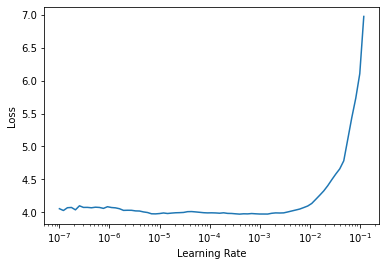

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, 1e-5)

epoch,train_loss,valid_loss,perplexity,time


epoch,train_loss,valid_loss,perplexity,time
0,3.506196,3.415234,30.424057,31:39


A perplexity of 100 means that whenever the model is predicting the next word, the model is as confused as if it had to pick between 100 different words

In [ ]:
#save model weights. Commented out since we don't need it now
learn.save("gpt2-finetuned-yelp-reviews-sample-1cycle-HomeServices")

Path('models/gpt2-finetuned-yelp-reviews-sample-1cycle-HomeServices.pth')

In [ ]:
%cp /content/models/gpt2-finetuned-yelp-reviews-sample-1cycle-HomeServices.pth /content/drive/MyDrive/YelpDataset/models

In [ ]:
df_valid.head(1)

,index,reviewText
23307,2830406,"Doug and company have been doing our windows for years. We couldn't be happier with the level of service and care they provide. Excellent work and attention to detail, completely trustworthy, and very reasonable pricing! They haven't been on Yelp until just now, so that's why there aren't many reviews so far. But don't let that worry you. They are the best around!"


### Review Example 1

In [ ]:
prompt = "The cleaner"

In [ ]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 2])

In [ ]:
preds = learn.model.generate(inp, max_length=70, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
tokenizer.decode(preds[0].cpu().numpy())

'The cleaner was very professional and did a great job. I would highly recommend them to anyone looking for a professional cleaning service.I have been using this company for over a year now and they are the best.  They are always on time and do a fantastic job!  I will definitely be using them again in the future for any cleaning needs.'

### Review Example 2



In [ ]:
prompt = "My key was broken"

In [ ]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 4])

In [ ]:
preds = learn.model.generate(inp, max_length=100, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
tokenizer.decode(preds[0].cpu().numpy())

'My key was broken and I had to call the office to get it fixed.  I was told they would call me back within a few days and that I would have to pay for the repair.\n\nI called them back the next day and they told me that they were going to send someone out to fix the problem. I called back a couple of days later and got a call back saying that the technician was out of town and would not be able to come to my house until Monday.'

### Review Example 3



In [ ]:
prompt = "The plumber was rude"

In [ ]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 5])

In [ ]:
preds = learn.model.generate(inp, max_length=60, num_beams=20, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2, top_k=100)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
tokenizer.decode(preds[0].cpu().numpy())

"The plumber was rude and unprofessional. I would not recommend this company to anyone.This is the worst company I have ever had the pleasure of working with.  They don't know what they are doing, they do not know how to do their job, and they charge you for it."

### Review Example 4



In [ ]:
prompt = "I came here about a month ago and I really like the massage"

In [ ]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 13])

In [ ]:
preds = learn.model.generate(inp, max_length=70, num_beams=4, temperature=0.75, early_stopping=True, no_repeat_ngram_size=3)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
tokenizer.decode(preds[0].cpu().numpy())

"I came here about a month ago and I really like the massage therapists. I've had a lot of massages in the past and this was by far the best one I've ever had. The staff is very friendly and the facility is very clean. I would definitely recommend this place to anyone looking for a great massage.I have been going to"